In [12]:
import pandas as pd

import plotly.express as px
from dash import Dash, dcc, html

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import os

In [13]:
from src.constants import AFRICAN_COUNTRIES
from src.data_loader import DATA_DIR

In [14]:
datapath = os.path.join(DATA_DIR, '1997-01-01-2023-12-31-Eastern_Africa-Middle_Africa-Northern_Africa-Southern_Africa-Western_Africa.csv')
df = pd.read_csv(datapath)

df

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,DRC31402,31 December 2023,2023,1,Political violence,Riots,Mob violence,Rioters (Democratic Republic of Congo),NaN,Rioters,...,-6.1500,23.6000,1,7 Sur 7; Election-Net; Radio Okapi; Twitter,New media-National,"On 31 December 2023, rioters burnt and ransack...",0,crowd size=no report,1704766907,186282.0
1,BFO11325,31 December 2023,2023,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,12.9871,-0.1245,1,Facebook,New media,"On 31 December 2023, a cattle hit an IED likel...",0,NaN,1704766910,2553.0
2,BFO11326,31 December 2023,2023,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,13.4417,0.5264,1,Whatsapp,New media,"On 31 December 2023, suspected JNIM militants ...",0,NaN,1704766910,5860.0
3,GAB472,31 December 2023,2023,2,Demonstrations,Protests,Peaceful protest,Protesters (Gabon),Labor Group (Gabon),Protesters,...,0.3901,9.4544,1,Gabon Actu,National,"Around 31 December 2023 (as reported), ex-work...",0,crowd size=no report,1704766911,19954.0
4,GHA2083,31 December 2023,2023,2,Political violence,Riots,Mob violence,Rioters (Ghana),Ahamansu Communal Group (Ghana); Yadzo Communa...,Rioters,...,7.7254,0.5080,1,Ghana Web,National,"Around 31 December 2023 (as reported), youths ...",0,crowd size=no report,1704766911,3264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358554,SIE7,01 January 1997,1997,3,Political violence,Battles,Armed clash,Kamajor Militia,NaN,Political militia,...,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,NaN,1670286851,NaN
358555,SIE8,01 January 1997,1997,3,Strategic developments,Strategic developments,Headquarters or base established,Military Forces of Sierra Leone (1996-1997),NaN,State forces,...,8.2013,-12.0600,2,No Peace Without Justice; SL-LED,Local partner-New media,base,0,NaN,1678830926,NaN
358556,CEN1,01 January 1997,1997,1,Political violence,Battles,Armed clash,Military Forces of the Central African Republi...,Mutiny of Military Forces of the Central Afric...,State forces,...,4.3612,18.5549,1,All Africa,Regional,"4 deaths reported, denied by both sides, anti-...",2,NaN,1714437981,NaN
358557,ANG1,01 January 1997,1997,3,Political violence,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,Political militia,...,-13.9000,17.3000,1,Angola Cronologia,National,30 cadavers found October 14,30,NaN,1743467517,NaN


In [15]:
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best'],
      dtype='object')

In [16]:
conflict_data_africa = df[df['country'].isin(AFRICAN_COUNTRIES)]

<Axes: >

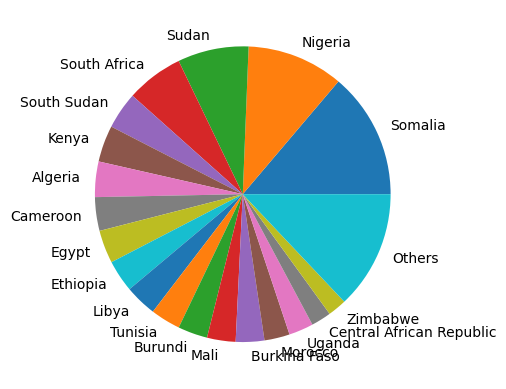

In [17]:
counts = conflict_data_africa['country'].value_counts()
pct = counts / counts.sum()
others = pct[pct < 0.02].sum()
main = pct[pct >= 0.02]
country_overview = pd.concat([main, pd.Series({'Others': others})])
country_overview.plot(kind="pie")

<Axes: >

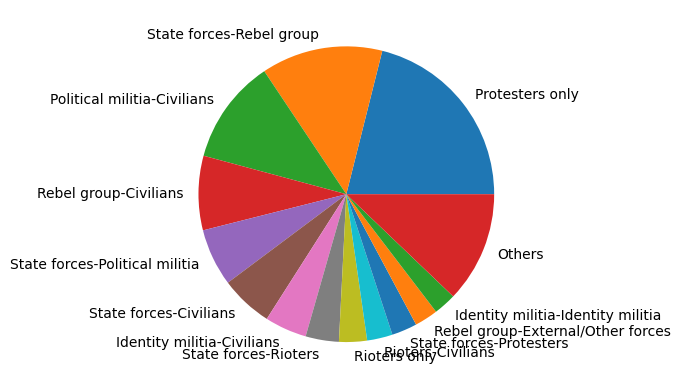

In [18]:
counts = conflict_data_africa['interaction'].value_counts()
pct = counts / counts.sum()
others = pct[pct < 0.02].sum()
main = pct[pct >= 0.02]
country_overview = pd.concat([main, pd.Series({'Others': others})])
country_overview.plot(kind="pie")

<Axes: xlabel='year'>

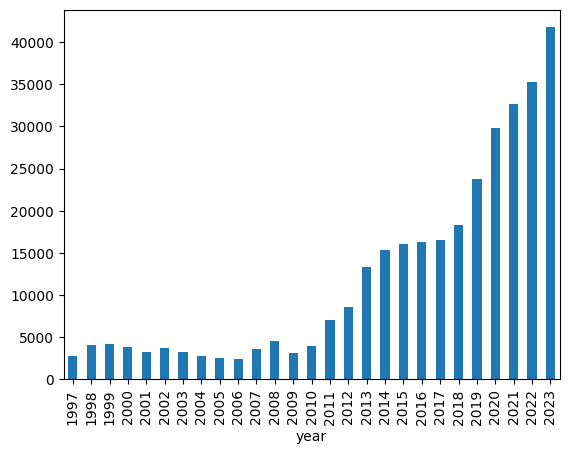

In [19]:
conflict_data_africa['year'].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='year'>

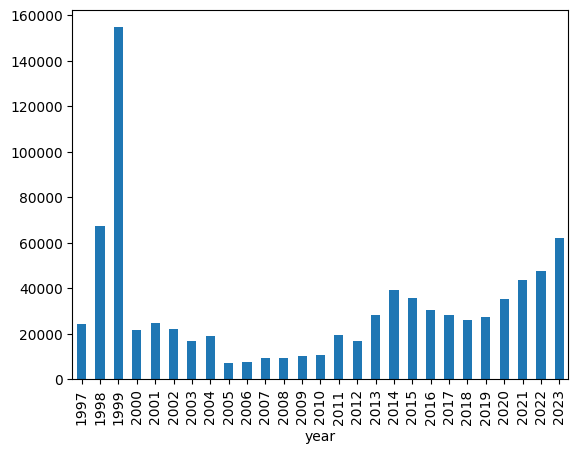

In [20]:
conflict_data_africa.groupby('year')['fatalities'].sum().sort_index().plot(kind="bar")

In [21]:
# usefull stats
sum_death = conflict_data_africa.groupby('location')['fatalities'].sum()
conflict_data_africa.loc[:,'frequency'] = conflict_data_africa.loc[:,'location'].map(sum_death)
median_no_death_over_locations = conflict_data_africa.frequency.median()
std_no_of_death_over_locations = conflict_data_africa.frequency.std()
conflict_data_africa.loc[:,'z_scores'] = (conflict_data_africa.loc[:,'frequency'] - median_no_death_over_locations) / std_no_of_death_over_locations

/var/folders/g0/xfp53vy55xs46l_byzw6zwq40000gn/T/ipykernel_36903/622769066.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g0/xfp53vy55xs46l_byzw6zwq40000gn/T/ipykernel_36903/622769066.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Precompute frequency per year
def preprocess_year(df, year):
    df_year = df[df['year'] == year].copy()
    no_death = df_year.groupby('location')['fatalities'].sum()
    df_year.loc[:,'frequency_year'] = conflict_data_africa['location'].map(no_death)
    df_year.loc[:,'z_scores'] = (df_year['frequency_year'] - median_no_death_over_locations) / std_no_of_death_over_locations
    return df_year[df_year['z_scores'] > 0]

# Unique years
years = sorted(conflict_data_africa['year'].unique())

# Dash App
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Conflict Hotspots in Africa by Year"),
    dcc.Slider(
        min=min(years),
        max=max(years),
        step=1,
        marks={str(year): str(year) for year in years},
        value=min(years),
        id='year-slider'
    ),
    html.Div([
        dcc.Graph(id='heatmap'),
        dcc.Graph(id='zoomed-heatmap')
    ], style={'display': 'flex', 'flexDirection': 'row'})
])

from dash.dependencies import Output, Input

@app.callback(
    Output('heatmap', 'figure'),
    Output('zoomed-heatmap', 'figure'),
    Input('year-slider', 'value')
)
def update_maps(selected_year):
    df_filtered = preprocess_year(conflict_data_africa, selected_year)

    # Global heatmap
    fig_global = px.density_mapbox(
        df_filtered,
        lat='latitude',
        lon='longitude',
        z='z_scores',
        radius=15,
        center=dict(lat=conflict_data_africa['latitude'].mean(), lon=conflict_data_africa['longitude'].mean()),
        zoom=1,
        mapbox_style="carto-positron",
        title=f"Conflict Hotspots - {selected_year} (Global View)"
    )

    # Zoomed-in heatmap - find densest point
    top_location = df_filtered.groupby(['latitude', 'longitude'])['z_scores'].mean().idxmax()
    center_lat, center_lon = top_location

    fig_zoomed = px.density_mapbox(
        df_filtered,
        lat='latitude',
        lon='longitude',
        z='z_scores',
        radius=15,
        center=dict(lat=center_lat, lon=center_lon),
        zoom=4,  
        mapbox_style="carto-positron",
        title=f"Conflict Hotspots - {selected_year} (Zoomed View)"
    )

    return fig_global, fig_zoomed

if __name__ == '__main__':
    app.run(debug=True)


/var/folders/g0/xfp53vy55xs46l_byzw6zwq40000gn/T/ipykernel_36903/180845835.py:41: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/g0/xfp53vy55xs46l_byzw6zwq40000gn/T/ipykernel_36903/180845835.py:57: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [28]:
conflict_data_africa.loc[:,'date'] = pd.to_datetime(conflict_data_africa['event_date'], errors='coerce')


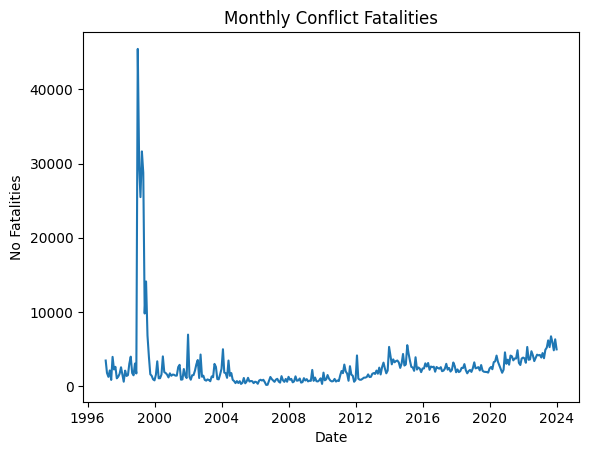

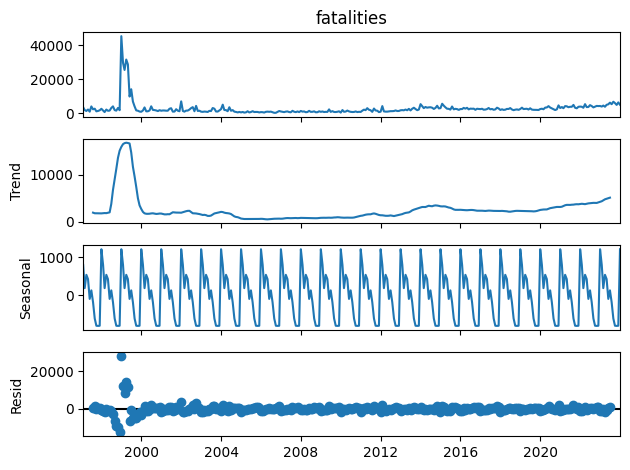

In [24]:
conflict_ts = conflict_data_africa.groupby('date')['fatalities'].sum().sort_index()

# 'M' for monthly
monthly_counts = conflict_ts.resample('ME').sum()

# Plot resampled time series
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Monthly Conflict Fatalities")
plt.xlabel("Date")
plt.ylabel("No Fatalities")
plt.show()

# Decompose
decompose = seasonal_decompose(monthly_counts, model='additive', period=12) 
decompose.plot()
plt.show()


2608.6481481481483
137
45473


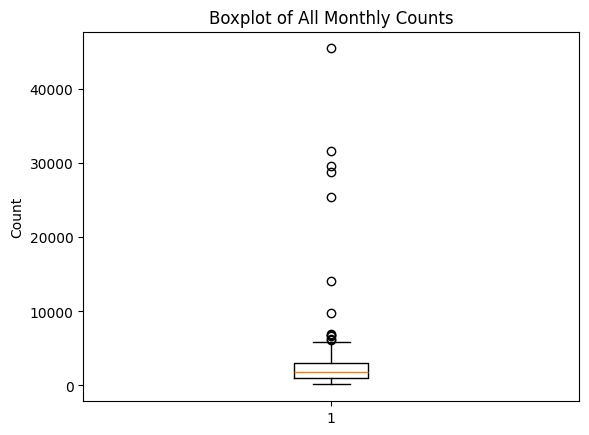

In [25]:
print(monthly_counts.values.mean())
print(monthly_counts.values.min())
print(monthly_counts.values.max())

# Boxplot of all values
plt.boxplot(monthly_counts.values)
plt.title("Boxplot of All Monthly Counts")
plt.ylabel("Count")
plt.show()

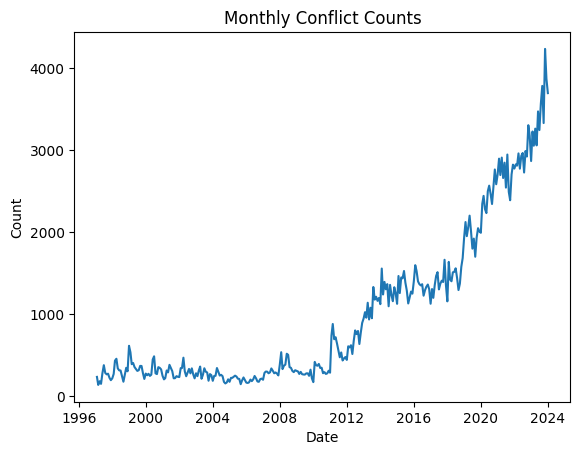

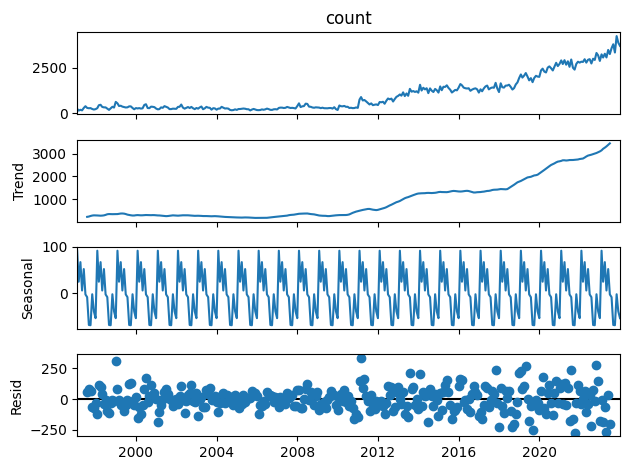

In [26]:
conflict_ts = conflict_data_africa.date.value_counts().sort_index()

# 'M' for monthly
monthly_counts = conflict_ts.resample('ME').sum()

# Plot resampled time series
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Monthly Conflict Counts")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Decompose
decompose = seasonal_decompose(monthly_counts, model='additive', period=12) 
decompose.plot()
plt.show()